In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

## Data Processing

In [2]:
descriptors = pd.read_csv('./descriptors.csv', delimiter = ';')
descriptors = descriptors.drop(descriptors.columns[0],axis=1)
descriptors

,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,52.0,29.0,35.333332,11.111111,23.0,46.0,90.0,44.0,70.000000,16.000000,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,148.33333,56.222220,64.0
1,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
3,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0
4,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2527,56.0,25.0,40.666668,10.222222,31.0,9.0,95.0,86.0,59.333332,33.555557,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,119.00000,73.333336,64.0
2528,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2529,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0


In [3]:
dataset = pd.read_csv('dataset.csv', delimiter = ';')
band_gaps = dataset["band_gap_vals"]
band_gaps

0       0.088699
1       1.447379
2       1.496388
3       0.544622
4       1.440079
          ...   
2526    1.653516
2527    0.000000
2528    1.232222
2529    0.302066
2530    1.231642
Name: band_gap_vals, Length: 2531, dtype: float64

In [4]:
X = descriptors
y = band_gaps

## PCA Using the Unscaled Dataset

In [5]:
pca1 = PCA(n_components = 2) # instruct PCA to reduce high-dimensional raw data into two components
X1 = pca1.fit_transform(X)

In [6]:
X1

array([[2020.50113147, -228.05480787],
       [-817.73038123,   60.31715611],
       [-817.73038123,   60.31715611],
       ...,
       [-817.73038123,   60.31715611],
       [ 401.10525044,  -42.10981256],
       [-817.73038123,   60.31715611]])

In [7]:
np.savetxt("PC1.csv", X1, delimiter=",") # store the dimensionality-reduced feature vector

In [8]:
pca1.explained_variance_ratio_ # shows how much of the variance is explained by the first two principal components

array([0.91068504, 0.06593856])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$c_2$')

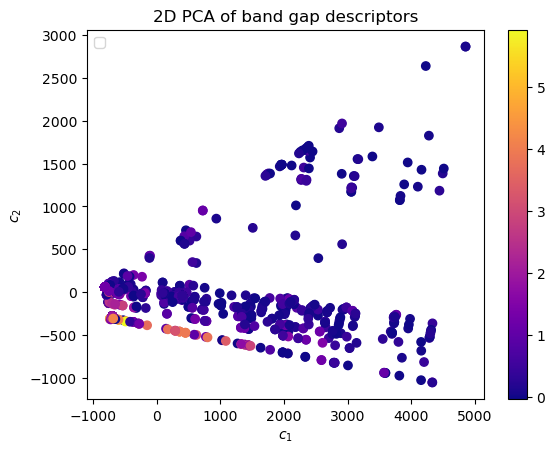

In [9]:
# plot the top 2 principal components against each other to visualise relationship
points = plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap="plasma")
plt.colorbar(points)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of band gap descriptors')
plt.xlabel('$c_1$')
plt.ylabel('$c_2$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'band gap')

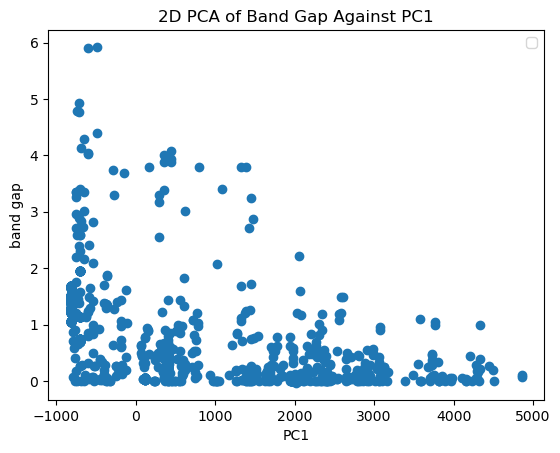

In [10]:
# plot the bandgap values against PC1 (principal component that explains most of the variance)
plt.scatter(X1[:, 0], y, cmap="yo")
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of Band Gap Against PC1')
plt.xlabel('PC1')
plt.ylabel('band gap')

## PCA Using the Scaled Dataset

In [11]:
scaler = StandardScaler()      
X_sd = scaler.fit_transform(X)
X_df = pd.DataFrame(X_sd, columns = X.columns)

In [12]:
X_df

,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,1.338310,1.005707,1.035976,0.813912,0.189217,-1.073801,1.601002,1.409791,-0.640714,1.172518,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,1.512022,1.563537,1.420450,0.782946,0.489238
1,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
3,-0.271002,-1.066068,0.585156,-1.218941,1.005247,0.398230,0.099562,-0.377217,0.364244,-0.339448,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,0.538894,0.087007,0.720776,0.428748,0.489238
4,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2527,1.677112,0.698777,1.757288,0.635200,1.005247,-3.018984,2.852202,3.617271,-1.831776,3.585553,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,1.512022,1.563537,0.804737,1.943510,0.489238
2528,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2529,-0.271002,-1.066068,0.585156,-1.218941,1.005247,0.398230,0.099562,-0.377217,0.364244,-0.339448,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,0.538894,0.087007,0.720776,0.428748,0.489238


In [13]:
pca2 = PCA(n_components = 2)
X2 = pca2.fit_transform(X_df)

In [14]:
pca2.explained_variance_ratio_

array([0.31656477, 0.20218255])

In [15]:
X2

array([[ 9.41600838, -1.54215514],
       [-3.44540133,  2.40395945],
       [-3.44540133,  2.40395945],
       ...,
       [-3.44540133,  2.40395945],
       [-2.26965159, -6.06014311],
       [-3.44540133,  2.40395945]])

In [16]:
np.savetxt("PC2.csv", X2, delimiter=",")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$c_2$')

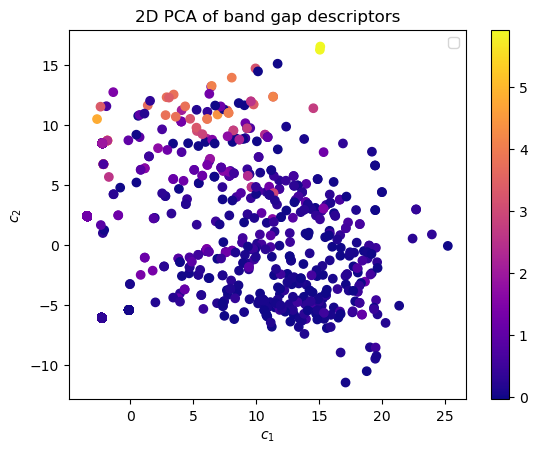

In [17]:
# plot the top 2 principal components against each other to visualise relationship
points = plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap="plasma")
plt.colorbar(points)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of band gap descriptors')
plt.xlabel('$c_1$')
plt.ylabel('$c_2$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'band gap')

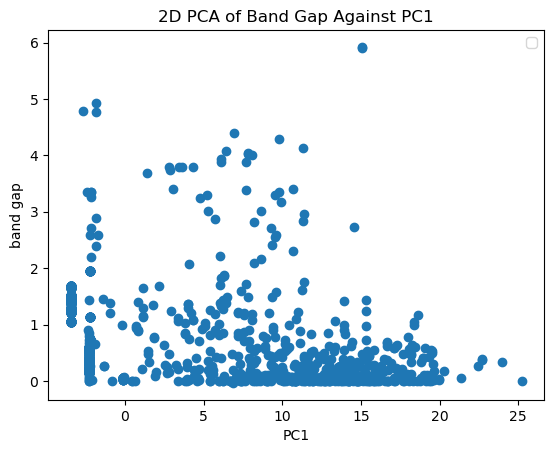

In [18]:
# plot the bandgap values against PC1 (principal component that explains most of the variance)
plt.scatter(X2[:, 0], y, cmap="yo")
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of Band Gap Against PC1')
plt.xlabel('PC1')
plt.ylabel('band gap')

## PCA Using Scaled & Reduced Dataset

In [19]:
descriptors_reduced = pd.read_csv('./descriptors_reduced.csv', delimiter = ';')
descriptors_reduced = descriptors_reduced.drop(descriptors_reduced.columns[0],axis=1)
descriptors_reduced

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,23.0,52.0,29.0,35.333332,11.111111,23.0,46.0,90.0,44.0,70.000000,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,148.33333,56.222220,64.0
1,15.0,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,...,0.000000,0.000000,0.000000,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2,31.0,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,...,0.000000,0.000000,0.000000,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0
3,17.0,31.0,14.0,21.000000,5.000000,17.0,3.0,94.0,91.0,66.250000,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,105.25000,61.875000,64.0
4,15.0,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,...,0.000000,0.000000,0.000000,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,19.0,41.0,22.0,30.333334,7.555555,19.0,3.0,74.0,71.0,41.333332,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,174.00000,73.333336,64.0
448,31.0,51.0,20.0,43.333332,8.222222,31.0,70.0,85.0,15.0,76.333336,...,0.000000,0.000000,0.000000,0.0,64.0,194.0,130.0,141.33333,51.555557,64.0
449,31.0,56.0,25.0,42.666668,8.888889,31.0,9.0,74.0,65.0,43.333332,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,174.00000,73.333336,64.0
450,4.0,31.0,27.0,18.666666,9.777778,4.0,11.0,74.0,63.0,50.666668,...,0.000006,0.000002,0.000003,0.0,64.0,194.0,130.0,150.66667,57.777780,64.0


In [20]:
dataset_reduced = pd.read_csv('dataset_reduced.csv', delimiter = ';')
band_gaps_eV = dataset_reduced["band_gap_vals_eV"]
band_gaps_eV

0      0.088699
1      1.447379
2      0.544622
3      3.400350
4      1.394320
         ...   
447    0.000000
448    0.318895
449    0.009700
450    0.005400
451    0.000000
Name: band_gap_vals_eV, Length: 452, dtype: float64

In [21]:
Xr = descriptors_reduced
yr = band_gaps_eV

In [22]:
scaler = StandardScaler()
Xr_sd = scaler.fit_transform(Xr)
Xr_scaled = pd.DataFrame(Xr_sd, columns = Xr.columns)

In [23]:
pca3 = PCA(n_components = 2)
X3 = pca3.fit_transform(Xr_scaled)

In [24]:
pca3.explained_variance_ratio_

array([0.24602018, 0.16101556])

In [25]:
X3

array([[-1.64029710e+00, -1.17167455e+00],
       [ 6.21334715e+00, -3.57654452e+00],
       [ 2.86897649e+00, -7.65442562e+00],
       [ 4.98247310e+00,  7.09405798e+00],
       [ 6.21334715e+00, -3.57654452e+00],
       [-4.44989706e+00, -1.22693085e-01],
       [ 4.38687505e+00, -4.17023540e-01],
       [ 9.36716058e+00, -1.25492873e+00],
       [ 5.74066884e+00,  4.18205714e-01],
       [ 9.36716058e+00, -1.25492873e+00],
       [ 6.21334715e+00, -3.57654452e+00],
       [ 1.39962666e+00,  6.10395768e+00],
       [ 9.36716058e+00, -1.25492873e+00],
       [ 6.21334715e+00, -3.57654452e+00],
       [ 4.66381847e+00,  8.28578497e+00],
       [-6.14260352e+00, -9.96758062e-01],
       [ 2.14183697e+00, -7.84339184e+00],
       [ 6.09838659e+00,  1.22612219e+00],
       [ 6.56952503e+00,  5.28253193e+00],
       [-6.01466754e+00, -4.48882657e+00],
       [-2.00299605e+00,  7.60882642e+00],
       [ 2.14183697e+00, -7.84339184e+00],
       [ 7.39321175e+00, -3.90465535e+00],
       [ 2.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$c_2$')

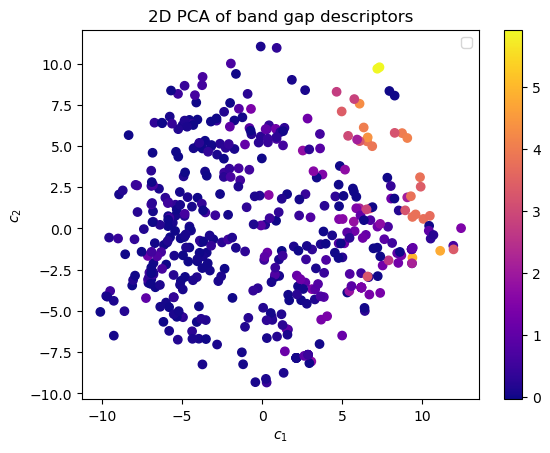

In [26]:
# plot the top 2 principal components against each other to visualise relationship
points = plt.scatter(X3[:, 0], X3[:, 1], c=yr, cmap="plasma")
plt.colorbar(points)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of band gap descriptors')
plt.xlabel('$c_1$')
plt.ylabel('$c_2$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'band gap')

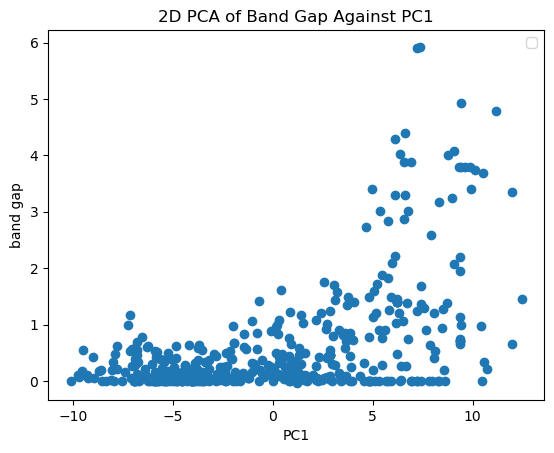

In [27]:
# plot the bandgap values against PC1 (principal component that explains most of the variance)
plt.scatter(X3[:, 0], yr, cmap="yo")
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('2D PCA of Band Gap Against PC1')
plt.xlabel('PC1')
plt.ylabel('band gap')